# The Sparks Foundation

## Graduate Rotational Internship Program

### GRIPDEC2020

## Task 2 From the given 'Iris' dataset, Predict the optimum number of clusters and represent it visually.

## Author : Pradeep K



##  1. Importing Libraries, Reading Data & Data Exploration

In [38]:
#Importing the required Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the iris dataset
iris = datasets.load_iris()
iris_file = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_file.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
iris_file.describe()
#count tells that all the 4 features have 150 rows
#in general ,From Mean we can say that sepal is larger than petal.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
iris_file.corr() #correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [41]:
iris_file #Shows the amount of data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
iris_file.info() #preview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [62]:
iris_file.describe() #summary of data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2. Model Building

###### Here we have the target variable ‘Class’. We need to remove the target variable so that this dataset can be used to work in an unsupervised learning environment. The iloc function is used to get the features we require. We also use '.values' function to get an array of the dataset. (Note that we transformed the dataset to an array so that we can plot the graphs of the clusters)

In [44]:
 x = iris_file.iloc[:, [0, 1, 2, 3]].values

###### Finding optimum number of clusters under K-Means Algorithm by using Elbow Method within-cluster-sum-of-squares(wcss) 

In [45]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve')

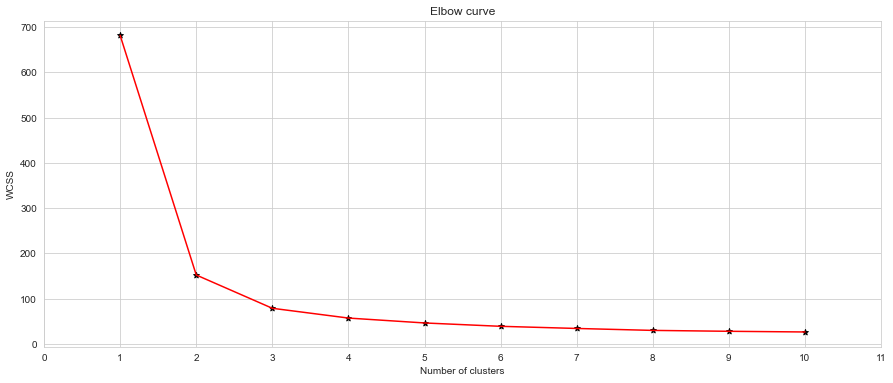

In [58]:
plt.figure(figsize=(15,10)) #Ploting Elbow Method
plt.scatter(range(1, 11), wcss,marker="*",c="black")       
plt.plot(range(1, 11), wcss,c="red")
plt.xlabel("Number of clusters")           
plt.ylabel("WCSS")
plt.xticks(range(0,12,1)) #for value of k from 0 to 11 in graph
plt.title("Elbow curve")

###### we can clearly see why it is called "the elbow mehtod" from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. In the above graph, there is no bend after the 3rd cluster, hence, 3 is the optimum number of clusters, i.e, k=3

## 3. Applying KMeans to the dataset

In [47]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, 
               precompute_distances = 'auto', tol = 0.0001, verbose = 0)
y_km = k_means.fit_predict(x)

In [57]:
y_km #predicted values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## 4. K-means Clusters

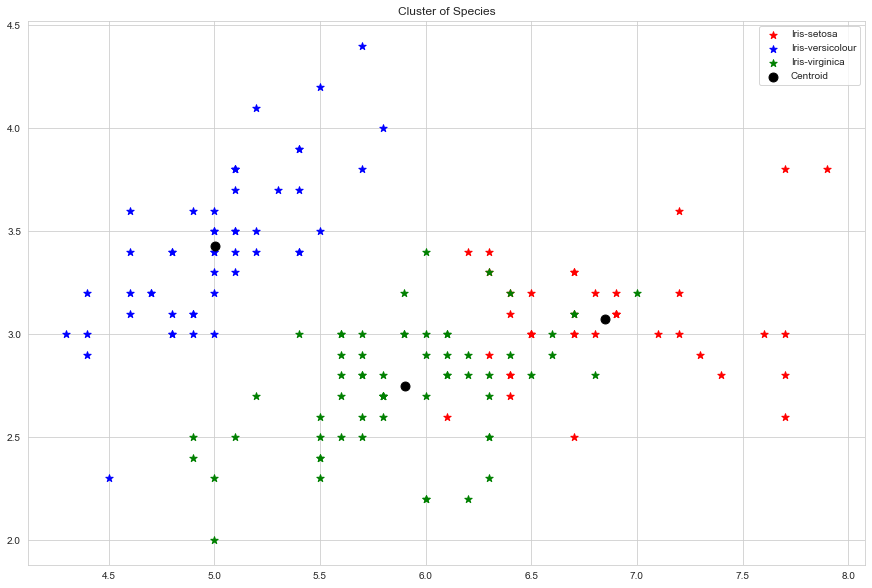

In [64]:
sns.set_style("whitegrid");
plt.figure(figsize=(15,10))
plt.scatter(x[y_km==0,0], x[y_km==0,1],s = 60,c = 'red', label = 'Iris-setosa' ,marker="*")
plt.scatter(x[y_km==1,0], x[y_km==1,1],s = 60,c = 'blue', label = 'Iris-versicolour' ,marker="*")
plt.scatter(x[y_km==2,0], x[y_km==2,1],s = 60,c = 'green', label = 'Iris-virginica' ,marker="*")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s = 80, c = 'black', label = 'Centroid')
plt.title("Cluster of Species")
plt.legend()
plt.show()

## 5. Conclusion

###  I have successfully predicted clusters using Unsupervised ML Algorithm K-Means Clusturing and was able to evaluate the model's clustering accuracy score.